In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# TRAIN DATA

In [8]:
df_train = pd.read_csv('.//Datasets//train.csv')

In [9]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df_train.shape

(891, 12)

# EXPLORATORY ANALYSIS

In [13]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

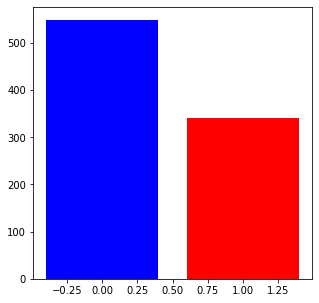

In [17]:
plt.figure(figsize = (5, 5))
plt.bar(list(df_train['Survived'].value_counts().keys()), list(df_train['Survived'].value_counts()), color = ['b', 'r'])
plt.show()

In [16]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

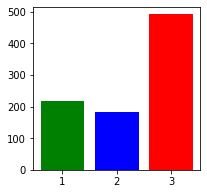

In [27]:
plt.figure(figsize = (3, 3))
plt.bar(list(df_train['Pclass'].value_counts().keys()), list(df_train['Pclass'].value_counts()), color = ['r', 'g', 'b'])
plt.show()

In [22]:
list(df_train['Sex'].value_counts())

[577, 314]

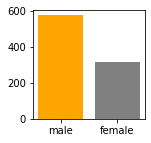

In [28]:
plt.figure(figsize = (2, 2))
plt.bar(list(df_train['Sex'].value_counts().keys()), list(df_train['Sex'].value_counts()), color = ['orange', 'grey'])
plt.show()

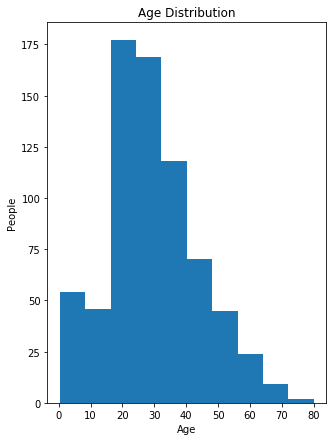

In [31]:
plt.figure(figsize = (5, 7))
plt.hist(df_train['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('People')
plt.show()

# DATA CLEANING

In [33]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df_train.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [36]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
df_train.replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)

In [40]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [42]:
df_train.dropna(inplace = True)

In [44]:
df_train.shape

(712, 8)

In [45]:
embarked = pd.get_dummies(df_train['Embarked'])

In [46]:
embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [47]:
df_train = pd.concat([df_train, embarked], axis = 1)

In [48]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,0,1


In [49]:
df_train.drop('Embarked', axis = 1, inplace = True)

In [50]:
df_train.rename(columns = {'C': 'C_embark', 'Q': 'Q_embark', 'S': 'S_embark'}, inplace = True)

In [51]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C_embark,Q_embark,S_embark
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [52]:
df_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C_embark,Q_embark,S_embark
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.363764,29.642093,0.514045,0.432584,34.567251,0.182584,0.039326,0.778090
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.386597,0.194506,0.415823
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,1.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.645850,0.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [61]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
C_embark      uint8
Q_embark      uint8
S_embark      uint8
dtype: object

In [62]:
#Lets split and train our model

In [63]:
x = df_train.drop('Survived', axis = 1)

In [72]:
y = df_train.Survived

# HYPER-PARAMETER TUNING

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [68]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
model_params = {
    
    'dtc': {
    'model': DecisionTreeClassifier(),
    'params': {
        'ccp_alpha': [0.0, 1, 5, 10],
        'min_samples_split': [2, 1, 5, 10]
        }
    },
    
    'lr': {  
    'model': LogisticRegression(),
    'params': {
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['lbfgs', 'liblinear', 'sag'],
        'C': [1, 5, 10]
        }
    },
    
    'svm': {
        'model': SVC(),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    
    'rfc': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    }
}

In [70]:
from sklearn.model_selection import GridSearchCV

In [75]:
scores = []

for model_name, mp, in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

D:\SW\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentatio

D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\SW\Installed\Anaconda\lib\

D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\SW\Installed\Anaconda\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

In [76]:
pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

,model,best_score,best_params
0,dtc,0.772540,"{'ccp_alpha': 0.0, 'min_samples_split': 10}"
1,lr,0.783719,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}"
2,svm,0.773840,"{'C': 1, 'kernel': 'linear'}"
3,rfc,0.787935,{'n_estimators': 10}


# Model Fitting

In [77]:
# so see this above table, we have got a best_score for the dataset using HyperParameter Tuning.
# Both LogisticRegression and RandomForestClassifier has a best_scores than other. 
# We choose RabdomForestClassifier as it score was lightly greater than LogisticRegression

# However all the scores are not much as best, all scores around less than 80%

# But however the training size increases, the prediction value score increases

In [78]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# TEST DATA

In [79]:
df_test = pd.read_csv('.//Datasets/test.csv')

In [80]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [83]:
df_test.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1, inplace = True)

df_test.replace(to_replace = ['male', 'female'], value = [0, 1], inplace = True)

embarked_test = pd.get_dummies(df_test['Embarked'])

df_test = pd.concat([df_test, embarked_test], axis = 1)

df_test.drop('Embarked', axis = 1, inplace = True)

df_test.rename(columns = {'C': 'C_embark', 'Q': 'Q_embark', 'S': 'S_embark'}, inplace = True)

In [84]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C_embark,Q_embark,S_embark
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


In [85]:
df_test.shape

(418, 9)

In [87]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
C_embark     0
Q_embark     0
S_embark     0
dtype: int64

In [88]:
df_test.dropna(inplace = True)

In [89]:
df_test['Survived'] = model.predict(df_test)

In [90]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C_embark,Q_embark,S_embark,Survived
0,3,0,34.5,0,0,7.8292,0,1,0,0
1,3,1,47.0,1,0,7.0000,0,0,1,0
2,2,0,62.0,0,0,9.6875,0,1,0,0
3,3,0,27.0,0,0,8.6625,0,0,1,1
4,3,1,22.0,1,1,12.2875,0,0,1,0


In [91]:
df_test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,C_embark,Q_embark,S_embark,Survived
409,3,1,3.0,1,1,13.775,0,0,1,1
411,1,1,37.0,1,0,90.000,0,1,0,1
412,3,1,28.0,0,0,7.775,0,0,1,0
414,1,1,39.0,0,0,108.900,1,0,0,1
415,3,0,38.5,0,0,7.250,0,0,1,0


In [94]:
x = df_test.drop('Survived', axis = 1)

In [95]:
model.score(x, model.predict(x))

1.0